___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

### The Imports


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas.api.types import is_list_like
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
start = datetime.datetime.strptime('01/01/06', '%x')
end = datetime.datetime.strptime('01/01/16', '%x')

In [11]:
#import pandas_datareader.data as web
#BAC = web.DataReader('BAC', 'morningstar', start, end)

In [12]:
df = pd.read_pickle('C:/Users/pradhyum/Downloads/all_banks')

In [13]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [10]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [25]:
all_bank_stocks = pd.DataFrame()
for ticker in tickers:
    df_ticker = df[ticker]
    df_ticker['Name'] = ticker
    all_bank_stocks = pd.concat([all_bank_stocks,df_ticker],axis=0)

all_bank_stocks.head()
    


c:\users\pradhyum\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Stock Info,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700,BAC
2006-01-04,47.00,47.24,46.45,46.58,17757900,BAC
2006-01-05,46.58,46.83,46.32,46.64,14970900,BAC
2006-01-06,46.80,46.91,46.35,46.57,12599800,BAC
2006-01-09,46.72,46.97,46.36,46.60,15620000,BAC


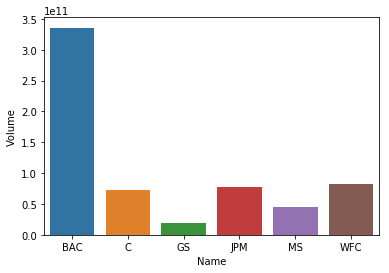

In [37]:
import seaborn as sns
sns.barplot(x='Name',y='Volume', data=all_bank_stocks.groupby('Name')['Volume'].sum().reset_index())

In [195]:
all_bank_stocks['Max_Change'] = all_bank_stocks['High'] - all_bank_stocks['Low']

def get_returns():
    returns = []
    for ticker in tickers:
        returns.extend(all_bank_stocks[all_bank_stocks['Name']==ticker]['Close'].pct_change(1))
    return np.array(returns)

all_bank_stocks['Return'] = get_returns()

all_bank_stocks.head()

Stock Info,Open,High,Low,Close,Volume,Name,Max_Change,Return
Date,,,,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700,BAC,1.03,NaN
2006-01-04,47.00,47.24,46.45,46.58,17757900,BAC,0.79,-0.010620
2006-01-05,46.58,46.83,46.32,46.64,14970900,BAC,0.51,0.001288
2006-01-06,46.80,46.91,46.35,46.57,12599800,BAC,0.56,-0.001501
2006-01-09,46.72,46.97,46.36,46.60,15620000,BAC,0.61,0.000644


In [196]:
idx = all_bank_stocks.groupby(['Name'])['Max_Change'].transform(max) == all_bank_stocks['Max_Change']
all_bank_stocks[idx]

Stock Info,Open,High,Low,Close,Volume,Name,Max_Change,Return
Date,,,,,,,,
2008-10-24,20.49,28.59,20.49,21.07,106422878,BAC,8.10,-0.083913
2008-09-18,146.30,174.00,128.50,166.50,34223912,C,45.50,0.186743
2008-09-18,106.00,120.00,85.88,108.00,114590630,GS,34.12,-0.056769
2015-08-24,59.29,62.92,50.07,60.25,36031073,JPM,12.85,-0.052673
2008-09-18,20.20,24.72,11.70,22.55,321561315,MS,13.02,0.036782
2008-09-19,44.30,44.69,37.01,39.80,96581264,WFC,7.68,0.075676


In [197]:
idx = all_bank_stocks.groupby(['Name'])['Max_Change'].transform(min) == all_bank_stocks['Max_Change']
all_bank_stocks[idx]

Stock Info,Open,High,Low,Close,Volume,Name,Max_Change,Return
Date,,,,,,,,
2014-08-14,15.26,15.32,15.26,15.32,29934562,BAC,0.06,0.004590
2009-04-27,30.50,0.00,30.20,30.70,19384992,C,-30.20,-0.037618
2013-12-27,176.39,176.45,175.57,176.35,1716906,GS,0.88,-0.000567
2006-12-20,48.33,48.37,48.14,48.22,6046000,JPM,0.23,-0.001036
2012-08-17,14.61,14.66,14.51,14.59,13840066,MS,0.15,0.000000
2007-05-18,36.24,36.44,36.28,36.42,11731367,WFC,0.16,0.004967


In [198]:
idx = all_bank_stocks.groupby(['Name'])['Return'].transform(max) == all_bank_stocks['Return']
all_bank_stocks[idx]

Stock Info,Open,High,Low,Close,Volume,Name,Max_Change,Return
Date,,,,,,,,
2009-04-09,8.15,9.85,8.00,9.55,1029694523,BAC,1.85,0.352691
2011-05-09,44.89,45.12,43.85,44.16,49169835,C,1.27,8.769912
2008-11-24,56.13,70.10,55.27,67.42,44623330,GS,14.83,0.264678
2009-01-21,19.29,22.84,18.88,22.63,136495297,JPM,3.96,0.250967
2008-10-13,15.43,19.06,12.66,18.10,199815501,MS,6.40,0.869835
2008-07-16,23.78,27.32,23.20,27.23,206249192,WFC,4.12,0.327645


In [199]:
idx = all_bank_stocks.groupby(['Name'])['Return'].transform(min) == all_bank_stocks['Return']
all_bank_stocks[idx]

Stock Info,Open,High,Low,Close,Volume,Name,Max_Change,Return
Date,,,,,,,,
2009-01-20,6.48,6.50,5.05,5.10,413892371,BAC,1.45,-0.289694
2011-05-06,4.55,4.58,4.50,4.52,513178690,C,0.08,-0.899107
2009-01-20,69.60,70.26,59.13,59.20,33135562,GS,11.13,-0.189596
2009-01-20,21.00,21.27,17.70,18.09,142148970,JPM,3.57,-0.207274
2008-10-09,17.98,18.30,11.95,12.45,102932615,MS,6.35,-0.258929
2009-01-20,16.77,17.02,13.82,14.23,203971797,WFC,3.20,-0.238223


# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

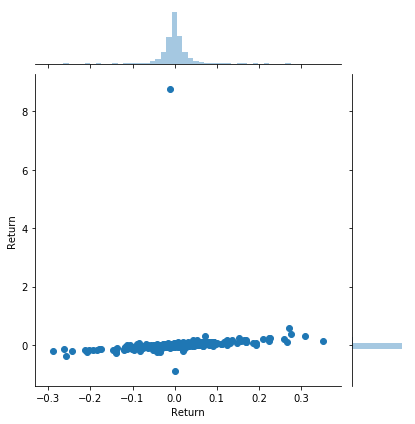

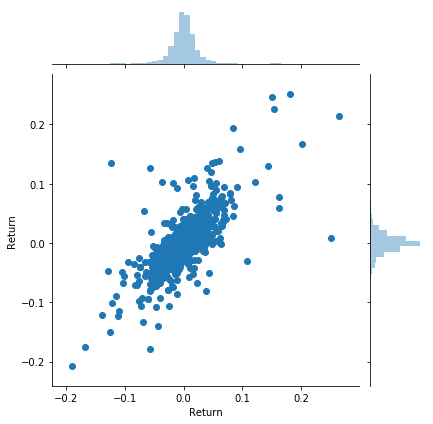

In [200]:
sns.jointplot(x=all_bank_stocks.groupby('Name').get_group('BAC')['Return'],y=all_bank_stocks.groupby('Name').get_group('C')['Return'])
sns.jointplot(x=all_bank_stocks.groupby('Name').get_group('GS')['Return'],y=all_bank_stocks.groupby('Name').get_group('JPM')['Return'])


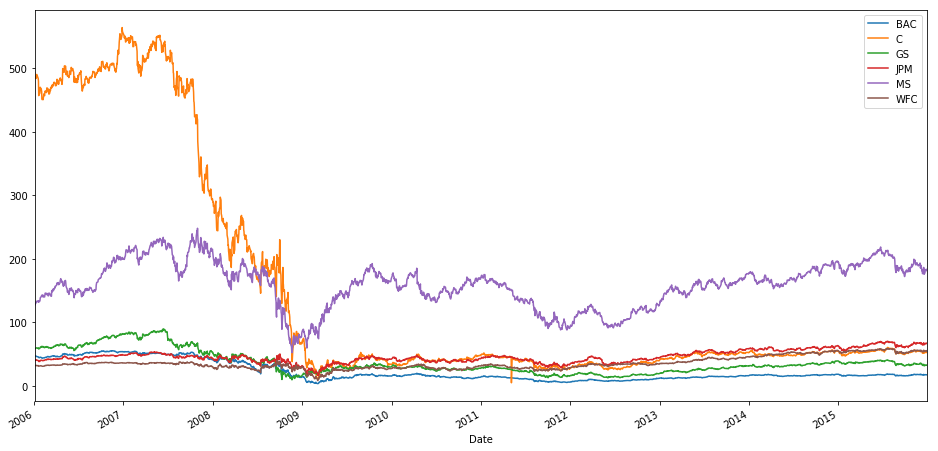

In [201]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(16,8))
all_bank_stocks[all_bank_stocks['Name']=='BAC']['Close'].plot()
all_bank_stocks[all_bank_stocks['Name']=='C']['Close'].plot()
all_bank_stocks[all_bank_stocks['Name']=='MS']['Close'].plot()
all_bank_stocks[all_bank_stocks['Name']=='JPM']['Close'].plot()
all_bank_stocks[all_bank_stocks['Name']=='GS']['Close'].plot()
all_bank_stocks[all_bank_stocks['Name']=='WFC']['Close'].plot()
plt.legend(labels=all_bank_stocks['Name'].unique())

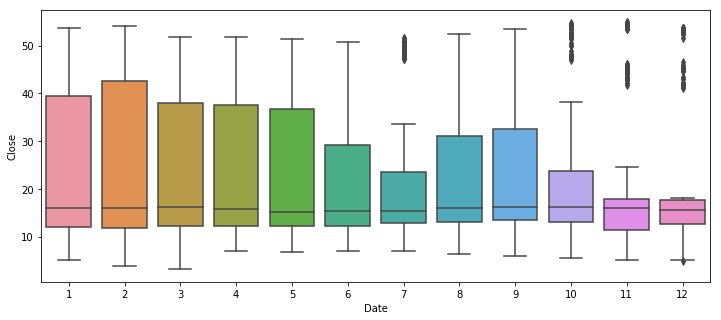

In [202]:
#all_bank_stocks.groupby([all_bank_stocks.index.month, all_bank_stocks['Name']])['Close']
fig, ax = plt.subplots(figsize=(12,5))
BAC_data = all_bank_stocks[all_bank_stocks['Name']=='BAC']
sns.boxplot(BAC_data.index.month, BAC_data['Close'] , ax=ax)


Text(0, 0.5, 'GS returns')

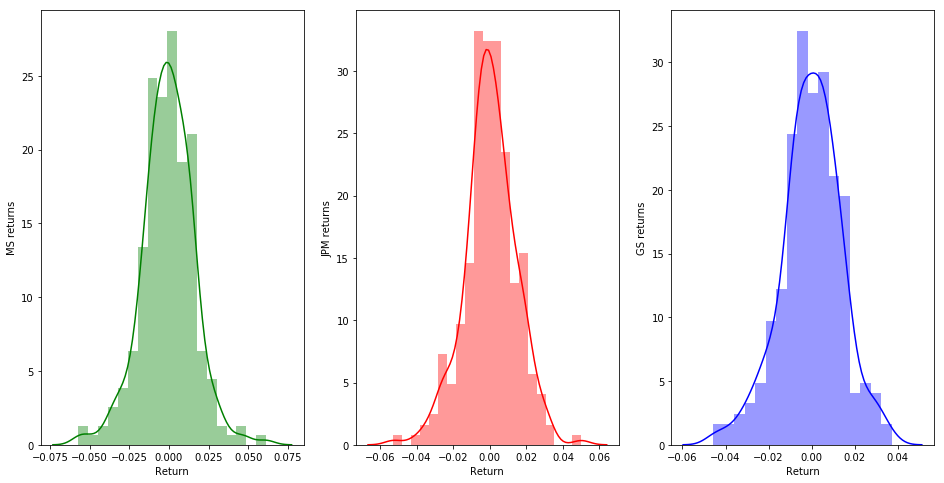

In [203]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
sns.distplot(all_bank_stocks[all_bank_stocks['Name']=='MS'].loc['2015-01-01':'2015-12-31']['Return'],color='green',ax=ax[0])
sns.distplot(all_bank_stocks[all_bank_stocks['Name']=='JPM'].loc['2015-01-01':'2015-12-31']['Return'],color='red',ax=ax[1])
sns.distplot(all_bank_stocks[all_bank_stocks['Name']=='GS'].loc['2015-01-01':'2015-12-31']['Return'],color='blue',ax=ax[2])
ax[0].set_ylabel('MS returns')
ax[1].set_ylabel('JPM returns')
ax[2].set_ylabel('GS returns')

#all_bank_stocks[all_bank_stocks['Name']=='MS'].loc['2015-01-01':'2015-12-31']['Return']

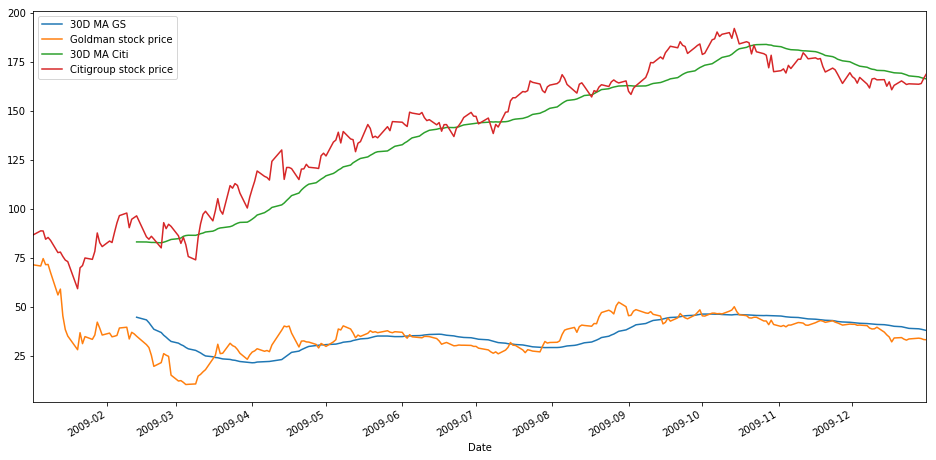

In [204]:
plt.figure(figsize=(16,8))
year_2009_prices = all_bank_stocks.loc[all_bank_stocks.index.year==2009]
year_2009_prices[year_2009_prices['Name']=='C']['Close'].rolling(window=30).mean().plot()
year_2009_prices[year_2009_prices['Name']=='C']['Close'].plot()
year_2009_prices = all_bank_stocks.loc[all_bank_stocks.index.year==2009]
year_2009_prices[year_2009_prices['Name']=='GS']['Close'].rolling(window=30).mean().plot()
year_2009_prices[year_2009_prices['Name']=='GS']['Close'].plot()
plt.legend(labels=['30D MA GS', 'Goldman stock price','30D MA Citi', 'Citigroup stock price'])


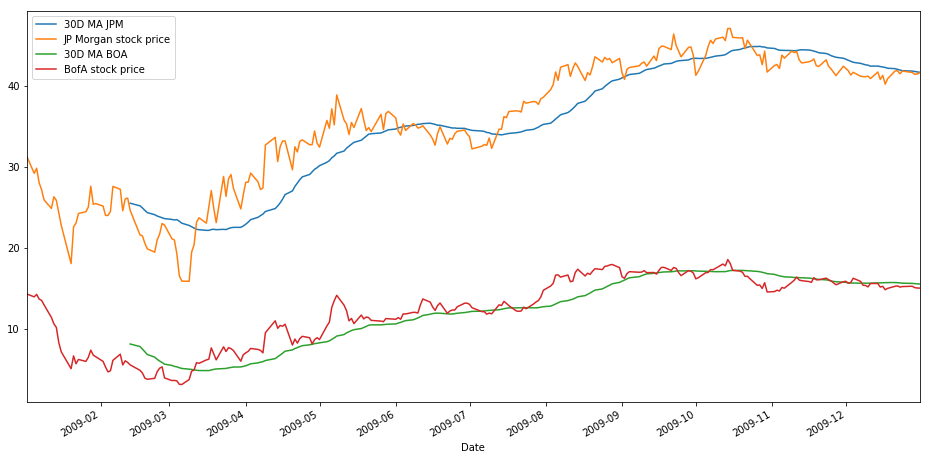

In [205]:
plt.figure(figsize=(16,8))
year_2009_prices = all_bank_stocks.loc[all_bank_stocks.index.year==2009]
year_2009_prices[year_2009_prices['Name']=='JPM']['Close'].rolling(window=30).mean().plot()
year_2009_prices[year_2009_prices['Name']=='JPM']['Close'].plot()
year_2009_prices = all_bank_stocks.loc[all_bank_stocks.index.year==2009]
year_2009_prices[year_2009_prices['Name']=='BAC']['Close'].rolling(window=30).mean().plot()
year_2009_prices[year_2009_prices['Name']=='BAC']['Close'].plot()
plt.legend(labels=['30D MA JPM', 'JP Morgan stock price','30D MA BOA', 'BofA stock price'])

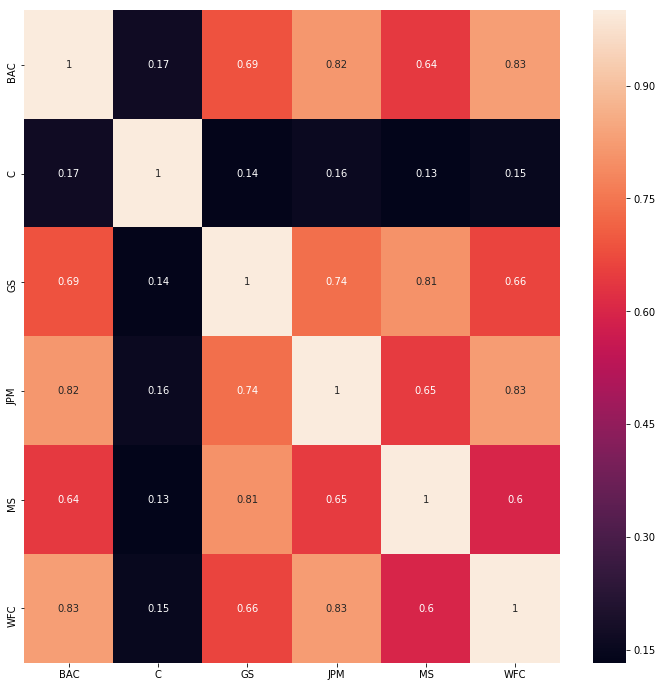

In [206]:
returns = pd.DataFrame(columns=tickers, index=all_bank_stocks.index)
for ticker in tickers:
    returns[ticker] = all_bank_stocks[all_bank_stocks['Name']==ticker]['Return']
    #returns = pd.concat([returns,df_ticker], axis=1)
plt.figure(figsize=(12,12))
sns.heatmap(returns.corr(),annot=True)

(<matplotlib.collections.LineCollection at 0x2432559c128>,
 <matplotlib.collections.PolyCollection at 0x24325548400>)

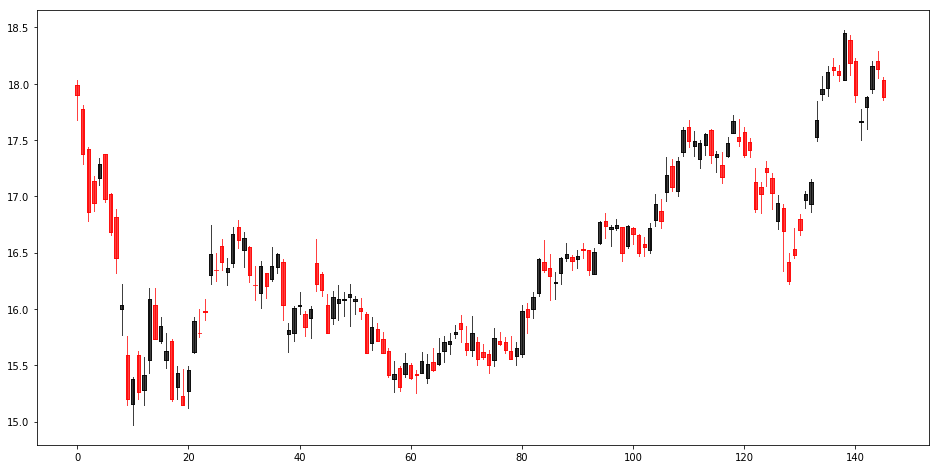

In [260]:
from mpl_finance import candlestick2_ohlc

BAC_data = df.xs('BAC', axis=1, level='Bank Ticker').loc['2015-01-01':'2015-08-01']
fig, ax = plt.subplots(figsize=(16,8))
candlestick2_ohlc(ax,BAC_data['Open'],BAC_data['High'],BAC_data['Low'],BAC_data['Close'],width=0.6)


(<matplotlib.collections.LineCollection at 0x24325a0eac8>,
 <matplotlib.collections.PolyCollection at 0x24325a0eb70>)

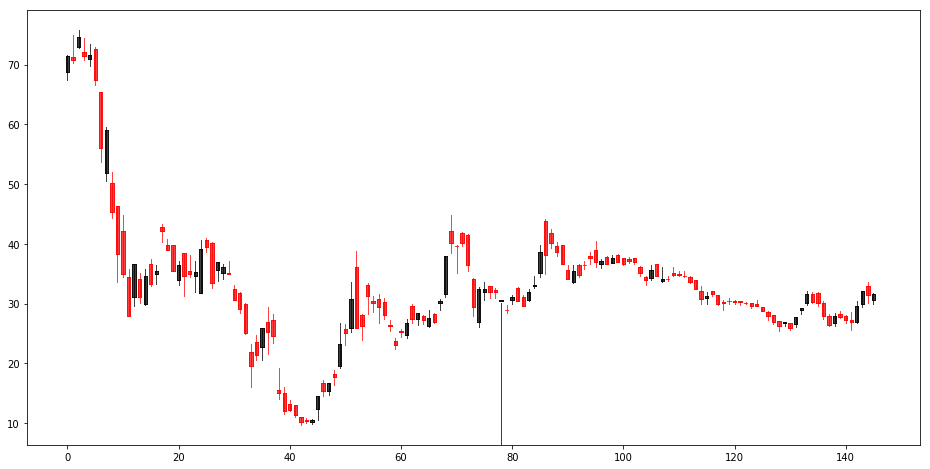

In [262]:
from mpl_finance import candlestick2_ohlc

C_data = df.xs('C', axis=1, level='Bank Ticker').loc['2009-01-01':'2009-08-01']
fig, ax = plt.subplots(figsize=(16,8))
candlestick2_ohlc(ax,C_data['Open'],C_data['High'],C_data['Low'],C_data['Close'],width=0.6)
